In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [49]:
data = pd.read_csv('data_scaled.csv')
data

,SP,RP,SRP,LRP,FHP,BHP,RANK,RANKDIFF,SA,SRA,FHA,BALANCE,WON
0,0.600,0.400,0.244,0.756,0.511,0.489,1,-0.062078,0.200,-0.512,0.022,0.353155,1.0
1,0.666,0.334,0.194,0.806,0.171,0.829,12,0.062078,0.332,-0.612,-0.658,0.879854,-1.0
2,0.522,0.478,0.295,0.705,0.720,0.280,3,-0.039504,0.044,-0.410,0.440,0.450243,1.0
3,0.558,0.442,0.205,0.795,0.617,0.383,10,0.039504,0.116,-0.590,0.234,0.478155,-1.0
4,0.561,0.439,0.157,0.843,0.578,0.422,3,0.011287,0.122,-0.686,0.156,0.492718,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.552,0.448,0.421,0.579,0.702,0.298,368,2.020364,0.104,-0.158,0.404,0.311893,-1.0
354,0.555,0.445,0.361,0.639,0.638,0.362,28,-0.152374,0.110,-0.278,0.276,0.310680,-1.0
355,0.525,0.475,0.275,0.725,0.615,0.385,55,0.152374,0.050,-0.450,0.230,0.350728,1.0
356,0.512,0.488,0.179,0.821,0.666,0.334,10,-0.744939,0.024,-0.642,0.332,0.513350,1.0


In [50]:
columns = ['SP', 'RP', 'SRP', 'LRP', 'FHP', 'BHP', 'RANKDIFF', 'SA', 'SRA', 'FHA', 'BALANCE']
X = data[columns]
y = data.WON

In [51]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [0.05, 0.1, 0.2,0.3, 0.5, 0.7,1]
#c_values = np.linspace(0.5,0.8,10)
param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

model = LogisticRegression(random_state=1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best: 0.698894 using {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
0.695625 (0.037897) with: {'C': 0.05, 'penalty': 'l2', 'solver': 'newton-cg'}
0.695625 (0.037897) with: {'C': 0.05, 'penalty': 'l2', 'solver': 'lbfgs'}
0.692596 (0.044138) with: {'C': 0.05, 'penalty': 'l2', 'solver': 'liblinear'}
0.689375 (0.043397) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.689375 (0.043397) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.689471 (0.040354) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.683221 (0.054491) with: {'C': 0.2, 'penalty': 'l2', 'solver': 'newton-cg'}
0.683221 (0.054491) with: {'C': 0.2, 'penalty': 'l2', 'solver': 'lbfgs'}
0.683221 (0.054491) with: {'C': 0.2, 'penalty': 'l2', 'solver': 'liblinear'}
0.683221 (0.056255) with: {'C': 0.3, 'penalty': 'l2', 'solver': 'newton-cg'}
0.683221 (0.056255) with: {'C': 0.3, 'penalty': 'l2', 'solver': 'lbfgs'}
0.683221 (0.056255) with: {'C': 0.

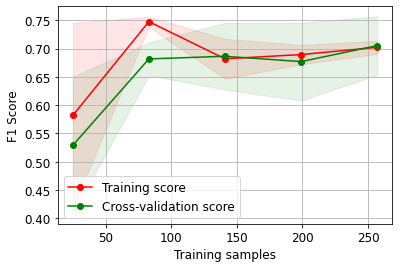

In [52]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, train_size=0.9, random_state=3)
grid_result = grid_search.fit(X_trainval, y_trainval)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print(grid_result.best_estimator_,"\n")
print("Validation Set")
scores1 = cross_val_score(grid_result.best_estimator_, X_trainval, y_trainval, cv=5, scoring='accuracy')
print("Accuracy Scores 5F CV")
print(scores1)
scores1 = pd.Series(scores1)
print("mean:",scores1.mean(), "std:", np.std(scores1))
print("")
print("F1 Scores 5F CV")
scores2 = cross_val_score(grid_result.best_estimator_, X_trainval, y_trainval, cv=5, scoring='f1')
print(scores2)
scores1 = pd.Series(scores2)
print("mean:",scores2.mean(), "std:", np.std(scores2))

print("")
print("Test Set")
grid_result.best_estimator_.fit(X_trainval, y_trainval)
y_pred = grid_result.best_estimator_.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

skplt.estimators.plot_learning_curve(grid_result.best_estimator_, X_trainval, y_trainval,
                                     cv=5, random_state=1, scoring="f1",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large", title=None);
plt.xlabel("Training samples")
plt.ylabel("F1 Score")
plt.savefig('LR TVT LC F1', dpi=300)

In [5]:
lines[0].get_data()

(array([1, 2, 3]), array([4, 5, 6]))

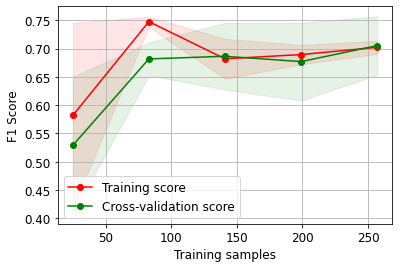

In [35]:
skplt.estimators.plot_learning_curve(grid_result.best_estimator_, X_trainval, y_trainval,
                                     cv=5, random_state=1, scoring="f1",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large", title=None);
plt.xlabel("Training samples")
plt.ylabel("F1 Score")
ax = plt.gca()

In [20]:
line = ax.lines[0]

In [21]:
line.get_data()

(array([ 25,  83, 141, 199, 257]),
 array([0.58181818, 0.74761016, 0.68191141, 0.6893483 , 0.70219048]))

In [22]:
line = ax.lines[1]
line.get_data()

(array([ 25,  83, 141, 199, 257]),
 array([0.52896066, 0.68169277, 0.68636096, 0.67693856, 0.70524272]))

In [37]:
ax.lines[0].get_data()

(array([ 25,  83, 141, 199, 257]),
 array([0.47777778, 0.7366489 , 0.69080354, 0.6857008 , 0.70500858]))

In [38]:
ax.lines[1].get_data()

(array([ 25,  83, 141, 199, 257]),
 array([0.53411424, 0.6941294 , 0.68878299, 0.64683442, 0.68887386]))

(array([ 25,  83, 141, 199, 257]),
 array([0.39111111, 0.74306379, 0.67260329, 0.66881812, 0.70614543]))

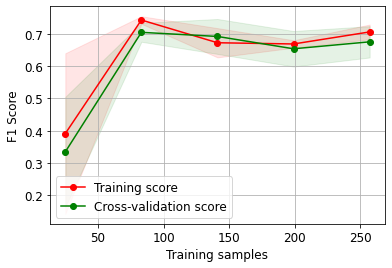

In [47]:
skplt.estimators.plot_learning_curve(LogisticRegression(solver='saga', penalty='l1')
, X_trainval, y_trainval,
                                     cv=5, random_state=1, scoring="f1",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large", title=None);
plt.xlabel("Training samples")
plt.ylabel("F1 Score")
plt.gca().lines[0].get_data()

In [53]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(grid_result.best_estimator_, X_trainval, y_trainval, cv=5)
conf_mat = confusion_matrix(y_trainval, y_pred)

In [54]:
conf_mat

array([[109,  51],
       [ 46, 116]])